# User Engagement Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")
from models.all_models import MLmodels as md
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

md = md()


In [2]:
warnings.filterwarnings('ignore')


In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
scripts_dir = os.path.join(parent_dir,"scripts") 
data_path = os.path.join(parent_dir,"data","telecom_clean_data.csv")
data_path2 = os.path.join(parent_dir,"data","user_overview_clean_data.csv")
data_path3 = os.path.join(parent_dir,"data","session_data.csv")
sys.path.insert(1, scripts_dir)

In [4]:
user_engegment_data=pd.read_csv(data_path3)

In [5]:
user_engegment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MSISDN/Number        106471 non-null  float64
 1   Num_of_xDR_sessions  106471 non-null  int64  
 2   session_duration     106471 non-null  float64
 3   Handset Type         106471 non-null  object 
 4   AVG RTT (S)          106471 non-null  float64
 5   AVG Bearer TP        106471 non-null  float64
 6   sec with vol<6.25kb  106471 non-null  float64
 7   Total_transmit       106471 non-null  float64
 8   Other_transmit       106471 non-null  float64
 9   Gaming               106471 non-null  float64
 10  Netflix              106471 non-null  float64
 11  Youtube              106471 non-null  float64
 12  Email                106471 non-null  float64
 13  Google               106471 non-null  float64
 14  Social Media         106471 non-null  float64
dtypes: float64(13), i

### Showing top 10 users

In [6]:
#relevant variables for analysing user engagment 
engagment_metrices=['Num_of_xDR_sessions','session_duration','Total_transmit']

In [7]:
#top_ten engagment   bsed on session frequency, session duration and toral volume
for cols in range(len(engagment_metrices)):
    print("\nTop 10 customers based on "+engagment_metrices[cols]+"\n")
    print(user_engegment_data.sort_values(by=engagment_metrices[cols], ascending=False).loc[:,['MSISDN/Number',engagment_metrices[cols]]].head(10))


Top 10 customers based on Num_of_xDR_sessions

       MSISDN/Number  Num_of_xDR_sessions
13467   3.362632e+10                   18
6404    3.361489e+10                   17
13123   3.362578e+10                   17
36909   3.365973e+10                   16
92584   3.376054e+10                   15
76077   3.367588e+10                   15
64883   3.366716e+10                   13
1270    3.360452e+10                   12
92239   3.376041e+10                   12
658     3.360313e+10                   12

Top 10 customers based on session_duration

       MSISDN/Number  session_duration
13123   3.362578e+10         18553.754
6404    3.361489e+10          9966.898
92584   3.376054e+10          9279.434
13467   3.362632e+10          8791.927
64883   3.366716e+10          8744.914
50096   3.366284e+10          6614.270
56951   3.366469e+10          6288.730
658     3.360313e+10          6287.761
65787   3.366746e+10          5649.882
92239   3.376041e+10          5321.667

Top 10 customer

In [8]:
#creating relevant features 
user_engegment_data['total volume']=user_engegment_data['Other_transmit']+user_engegment_data['Gaming']+user_engegment_data['Netflix']+user_engegment_data['Youtube']+user_engegment_data['Email']+user_engegment_data['Google']+user_engegment_data['Social Media']
user_engegment_data['session frequency']=user_engegment_data['Num_of_xDR_sessions']
user_engegment_data['session duration']=user_engegment_data['session_duration']
engagment_metrices=['session frequency','session duration','total volume']

user_engegment_data=user_engegment_data[engagment_metrices]

In [9]:
user_engegment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   session frequency  106471 non-null  int64  
 1   session duration   106471 non-null  float64
 2   total volume       106471 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.4 MB


# Preprocessing User Engagment Data

In [12]:
#Normalizing basic Enagement metric features
normalized_user_engegment_data  = user_engegment_data.loc[:,engagment_metrices].values
normalized_user_engegment_data = StandardScaler().fit_transform(normalized_user_engegment_data)
normalized_user_engegment_data

array([[-0.48922805, -0.16000857, -0.02753859],
       [-0.48922805,  0.18577498, -1.00195503],
       [-0.48922805, -0.06219111, -0.22344525],
       ...,
       [-0.48922805,  3.91727312, -0.68873104],
       [-0.48922805,  0.57063405, -0.64016328],
       [-0.48922805,  3.8768522 , -0.89266989]])

In [15]:
#check if the mean of Noramlization is 0 and std of 1
np.mean(normalized_user_engegment_data), np.std(normalized_user_engegment_data)

(-1.953134412179116e-17, 1.0)

In [21]:
# after Normalization changing np array into dataframe
normalized_user_engegment_data=pd.DataFrame(normalized_user_engegment_data, columns=engagment_metrices)
normalized_user_engegment_data.head(), normalized_user_engegment_data.shape

(   session frequency  session duration  total volume
 0          -0.489228         -0.160009     -0.027539
 1          -0.489228          0.185775     -1.001955
 2          -0.489228         -0.062191     -0.223445
 3          -0.489228         -0.518292     -0.988694
 4           0.749944         -0.586763      1.137031,
 (106471, 3))

In [23]:
 # Fitting the data with kmeans of k=3
kmeans = KMeans(3)
kmeans.fit(normalized_user_engegment_data)
clusters = kmeans.fit_predict(normalized_user_engegment_data)
centroids = kmeans.cluster_centers_
clusters


array([0, 0, 0, ..., 2, 0, 0])

In [25]:
#add number of cluster into engement dataframe
normalized_user_engegment_data['cluster number']=clusters
normalized_user_engegment_data

,session frequency,session duration,total volume,cluster number
0,-0.489228,-0.160009,-0.027539,0
1,-0.489228,0.185775,-1.001955,0
2,-0.489228,-0.062191,-0.223445,0
3,-0.489228,-0.518292,-0.988694,0
4,0.749944,-0.586763,1.137031,2
...,...,...,...,...
106466,-0.489228,-0.738423,-0.324553,0
106467,-0.489228,-0.029928,-0.706401,0
106468,-0.489228,3.917273,-0.688731,2
106469,-0.489228,0.570634,-0.640163,0


In [31]:
# aggregate each non normilized engement matrices by clusters
#cluster by max
cluster_by_max = pd.DataFrame()
cluster_by_max['xDR max']=user_engegment_data.groupby([clusters])['session frequency'].agg('max')
cluster_by_max['Dur max (S)']=user_engegment_data.groupby([clusters])['session duration'].agg('max')
cluster_by_max['vol max']=user_engegment_data.groupby([clusters])['total volume'].agg('max')
cluster_by_max


,xDR max,Dur max (S),vol max
0,2,1042.254,1.780674e+09
1,18,18553.754,1.634152e+10
2,4,1573.420,4.529200e+09


In [32]:
#cluster by min
cluster_by_min = pd.DataFrame()
cluster_by_min['xDR min']=user_engegment_data.groupby([clusters])['session frequency'].agg('min')
cluster_by_min['Dur min (S)']=user_engegment_data.groupby([clusters])['session duration'].agg('min')
cluster_by_min['vol min']=user_engegment_data.groupby([clusters])['total volume'].agg('min')
cluster_by_min

,xDR min,Dur min (S),vol min
0,1,7.142,5.836229e+07
1,2,66.594,1.109176e+09
2,1,18.235,3.600827e+08


In [33]:
#cluster by mean
cluster_by_mean = pd.DataFrame()
cluster_by_mean['xDR mean']=user_engegment_data.groupby([clusters])['session frequency'].agg('mean')
cluster_by_mean['Dur mean (S)']=user_engegment_data.groupby([clusters])['session duration'].agg('mean')
cluster_by_mean['vol mean']=user_engegment_data.groupby([clusters])['total volume'].agg('mean')
cluster_by_mean

,xDR mean,Dur mean (S),vol mean
0,1.011725,103.123932,9.177192e+08
1,4.387662,646.102289,4.120536e+09
2,2.162648,209.452603,2.000047e+09


<AxesSubplot:title={'center':'Maximum total traffic distribution per cluster'}, ylabel='vol max'>

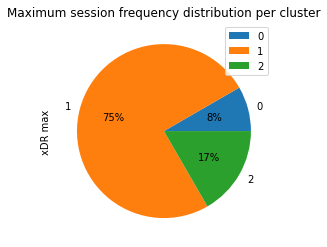

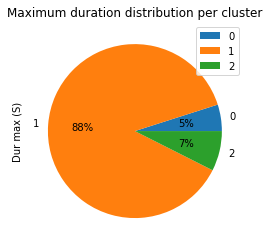

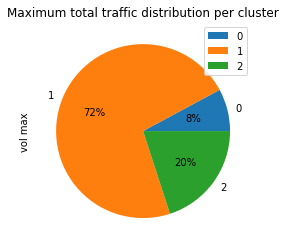

In [54]:
#ploting clusters by max, min and mean

cluster_by_max.plot(kind='pie',y='xDR max',autopct='%1.0f%%',title='Maximum session frequency distribution per cluster')
cluster_by_max.plot(kind='pie',y='Dur max (S)',autopct='%1.0f%%',title='Maximum duration distribution per cluster')
cluster_by_max.plot(kind='pie',y='vol max',autopct='%1.0f%%',title='Maximum total traffic distribution per cluster')


In [43]:
cluster_by[1][all_clusters[2]]

KeyError: 'vol max'